# Sandbox of how to do the shrinking

Created a method on the Cell class to do the shrinking

Just visually checking that the shrinking looks correct here


In [1]:
%%time
import sprawl
from sprawl import plotting

import matplotlib.pyplot as plt
import seaborn as sns
import shapely

In [2]:
sample = sprawl.HDF5('../../inputs/m1s1_subset.hdf5')
sample.num_cells

152

In [3]:
sample.cell_ids[:10]

['100090299132393774825374529480599642352',
 '102762322167228082486052775619884277102',
 '103963394979214788325793179983943807873',
 '104773525917171323315032845506736864421',
 '104887114217211410540888577620028568901',
 '106736575396305345683133461207739252997',
 '106771113274834466403933341586053551462',
 '111300904473796808480218743996654298162',
 '114601597319929030309061287706907914361',
 '114794480420405132420944298037591232478']

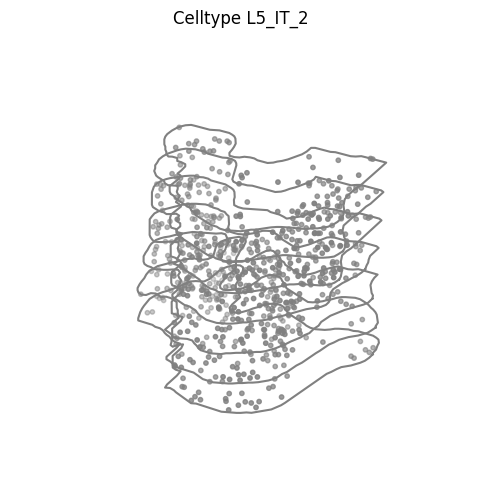

In [4]:
cell = sample.get_cells_by_id(['103963394979214788325793179983943807873'])[0]
plotting.plot_cell_3D(cell)
plt.show()
plt.close()

In [5]:
new_cell = cell.shrink_boundaries(scale_factor=0.8)
new_cell

Cell-103963394979214788325793179983943807873-L5_IT_2

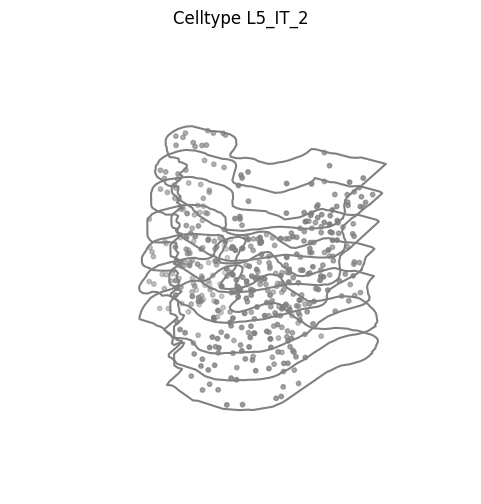

In [6]:
plotting.plot_cell_3D(new_cell)
plt.show()
plt.close()

In [7]:
cell.n

700

In [8]:
new_cell.n

448

In [41]:
len(new_cell.boundaries)

3

In [40]:
len(cell.boundaries)

5

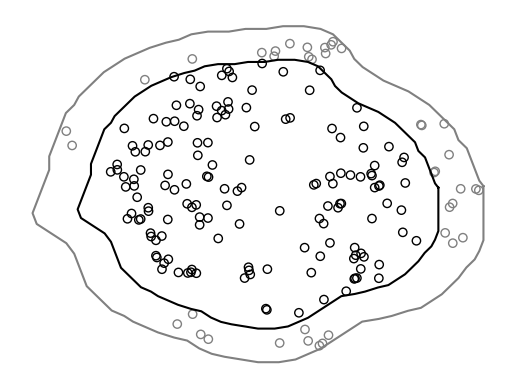

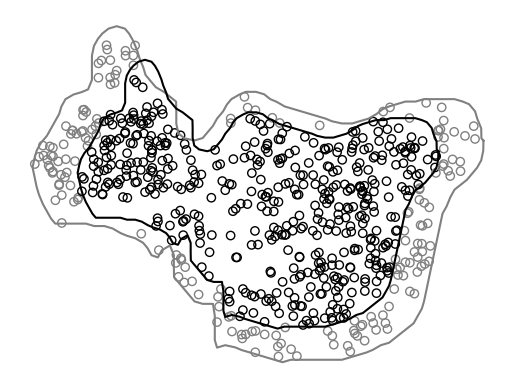

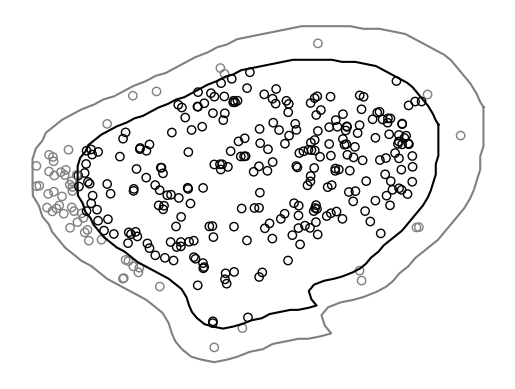

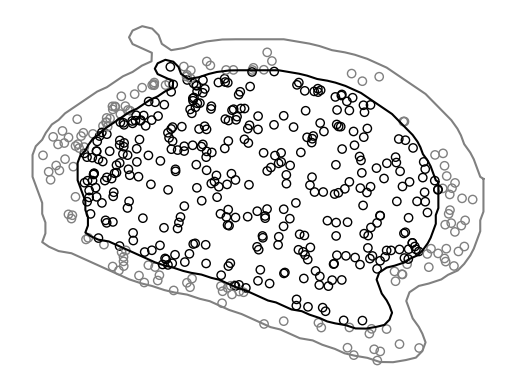

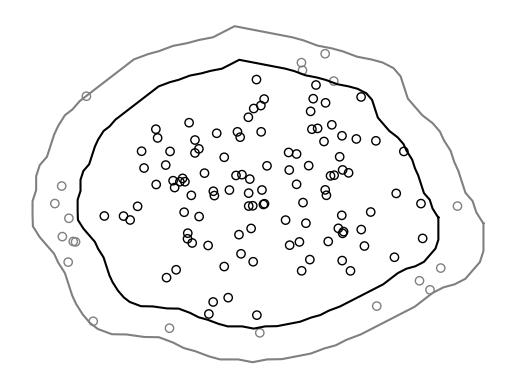

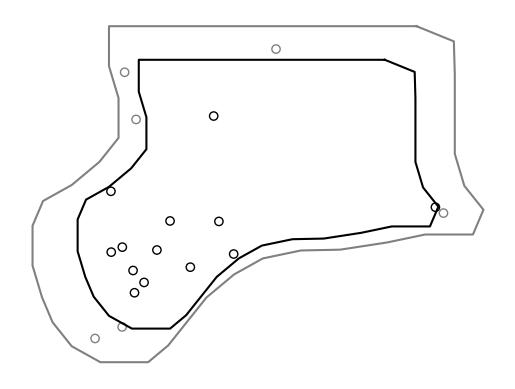

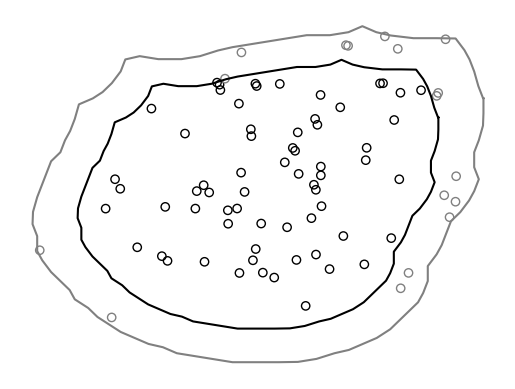

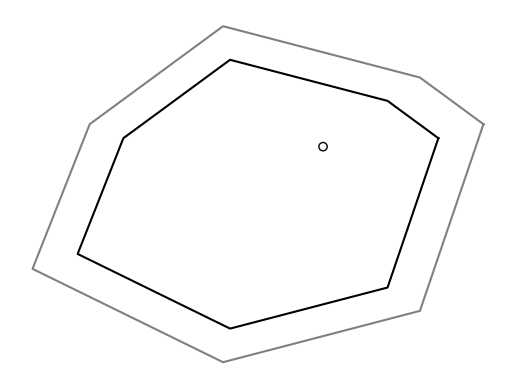

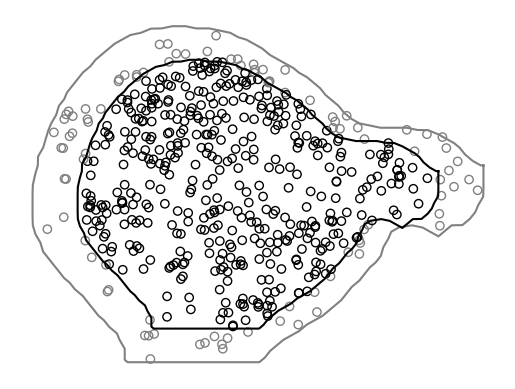

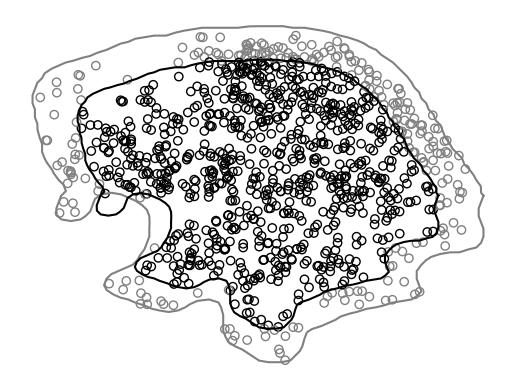

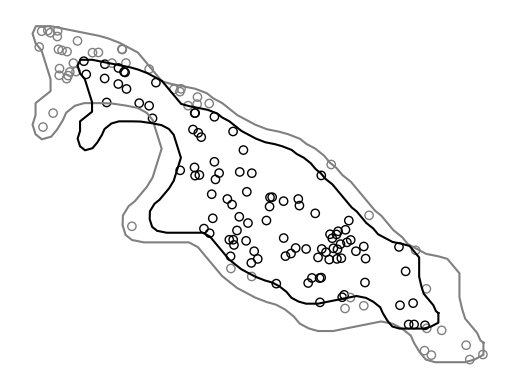

In [47]:
for i,cell in enumerate(sample.iter_cells()):

    new_cell = cell.shrink_boundaries(scale_factor=0.8)
    
    if '0' not in new_cell.boundaries:
        continue
    

    
    s = shapely.geometry.Polygon(cell.boundaries['0'])
    small_s = shapely.geometry.Polygon(new_cell.boundaries['0'])
    for z,xy in cell.spot_coords.items():
        for x,y in zip(xy[:,0],xy[:,1]):
            
            #have to do this because I'm just using one z-plane of the cell, so some spots will look outside
            #but they are just contained in a different z-plane
            if not s.contains(shapely.geometry.Point(x,y)):
                continue
            
            plt.scatter(
                x = x,
                y = y,
                facecolors='none',
                edgecolors='black' if small_s.contains(shapely.geometry.Point(x,y)) else 'grey',
            )

    plt.plot(*s.exterior.xy, color='grey')
    plt.plot(*small_s.exterior.xy, color='black')
    plt.axis('off')
    plt.savefig(f'cell_shrinking_examples/{cell.cell_id}_shrunken_cell_example.svg')
    plt.show()
    plt.close()
    
    #just do this for the first couple of cells
    if i > 10:
        break
